Supervised Learning - Binary Classification with ANN

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
import tensorflow as tf
from keras.constraints import maxnorm
from keras.optimizers import SGD
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Loan Defaulter Dataset

In [ ]:
df = pd.read_csv("Training Data.csv")
df.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
df.columns

Index(['Id', 'income', 'age', 'experience', 'married', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_years',
       'current_house_years', 'risk_flag'],
      dtype='object')

In [ ]:
df.describe()

,Id,income,age,experience,current_job_years,current_house_years,risk_flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063863,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Id                   252000 non-null  int64 
 1   income               252000 non-null  int64 
 2   age                  252000 non-null  int64 
 3   experience           252000 non-null  int64 
 4   married              252000 non-null  object
 5   house_ownership      252000 non-null  object
 6   car_ownership        252000 non-null  object
 7   profession           252000 non-null  object
 8   city                 252000 non-null  object
 9   state                252000 non-null  object
 10  current_job_years    252000 non-null  int64 
 11  current_house_years  252000 non-null  int64 
 12  risk_flag            252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


One-Hot Encoding

In [ ]:
df = pd.get_dummies(df)
print('Training Features shape: ', df.shape)

Training Features shape:  (252000, 411)


Imbalanced Data Visualisation

Class 0: 221004
Class 1: 30996
Proportion: 7.13 : 1


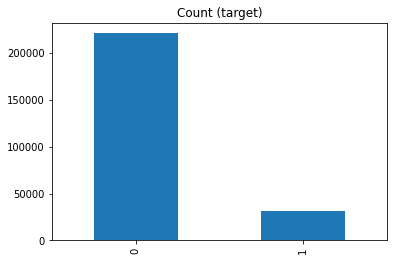

In [ ]:
target_count = df.risk_flag.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

Normalzing the continous data

In [ ]:
cols = ['income','age','experience','current_job_years','current_house_years']
for column in cols:
    df[column] = preprocessing.MinMaxScaler().fit_transform(np.array(df[column]).reshape(-1,1))
df.head()  

,Id,income,age,experience,current_job_years,current_house_years,risk_flag,married_married,married_single,house_ownership_norent_noown,house_ownership_owned,house_ownership_rented,car_ownership_no,car_ownership_yes,profession_Air_traffic_controller,profession_Analyst,profession_Architect,profession_Army_officer,profession_Artist,profession_Aviator,profession_Biomedical_Engineer,profession_Chartered_Accountant,profession_Chef,profession_Chemical_engineer,profession_Civil_engineer,profession_Civil_servant,profession_Comedian,profession_Computer_hardware_engineer,profession_Computer_operator,profession_Consultant,profession_Dentist,profession_Design_Engineer,profession_Designer,profession_Drafter,profession_Economist,profession_Engineer,profession_Fashion_Designer,profession_Financial_Analyst,profession_Firefighter,profession_Flight_attendant,...,city_Uluberia,city_Unnao,city_Vadodara,city_Varanasi,city_Vasai-Virar,city_Vellore,city_Vijayanagaram,city_Vijayawada,city_Visakhapatnam[4],city_Warangal[11][12],city_Yamunanagar,state_Andhra_Pradesh,state_Assam,state_Bihar,state_Chandigarh,state_Chhattisgarh,state_Delhi,state_Gujarat,state_Haryana,state_Himachal_Pradesh,state_Jammu_and_Kashmir,state_Jharkhand,state_Karnataka,state_Kerala,state_Madhya_Pradesh,state_Maharashtra,state_Manipur,state_Mizoram,state_Odisha,state_Puducherry,state_Punjab,state_Rajasthan,state_Sikkim,state_Tamil_Nadu,state_Telangana,state_Tripura,state_Uttar_Pradesh,state_Uttar_Pradesh[5],state_Uttarakhand,state_West_Bengal
0,1,0.129487,0.034483,0.15,0.214286,0.75,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0.757206,0.327586,0.50,0.642857,0.75,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0.398564,0.775862,0.20,0.285714,0.00,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0.625263,0.344828,0.10,0.142857,0.50,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,5,0.576454,0.448276,0.55,0.214286,1.00,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
y = df[['risk_flag']].values
df.drop(['risk_flag'], axis = 1,inplace = True)
df.drop(['Id'],axis = 1,inplace = True)
X = df.values
X[:5]

array([[0.1294868 , 0.03448276, 0.15      , ..., 0.        , 0.        ,
        0.        ],
       [0.75720597, 0.32758621, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.39856389, 0.77586207, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.62526262, 0.34482759, 0.1       , ..., 0.        , 0.        ,
        0.        ],
       [0.576454  , 0.44827586, 0.55      , ..., 0.        , 0.        ,
        0.        ]])

SMOTE (Synthetic Minority Over-sampling technique) for rectifying the data imbalance

In [ ]:
smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)
print('Training samples after SMOTE minority oversampling shape: ', X_sm.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Training samples after SMOTE minority oversampling shape:  (442008, 409)


Model Training and Evaluation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.04, random_state = 101)

ANN Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dropout(0.2, input_shape=(409,)),
    tf.keras.layers.Dense(409,activation = 'relu'),
    tf.keras.layers.Dense(96,activation = 'relu',kernel_constraint=maxnorm(5)),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
                         ])

In [ ]:
sgd = SGD(lr=0.1, momentum=0.9)
model.compile(optimizer = sgd, loss = 'binary_crossentropy',metrics = ['AUC'])

In [ ]:
model.fit(X_train,y_train,epochs = 5)

Epoch 1/5
13261/13261 [==============================] - 52s 4ms/step - loss: 0.6557 - auc: 0.6339
Epoch 2/5
13261/13261 [==============================] - 50s 4ms/step - loss: 0.5025 - auc: 0.8332
Epoch 3/5
13261/13261 [==============================] - 49s 4ms/step - loss: 0.4418 - auc: 0.8743
Epoch 4/5
13261/13261 [==============================] - 50s 4ms/step - loss: 0.4162 - auc: 0.8884
Epoch 5/5
13261/13261 [==============================] - 51s 4ms/step - loss: 0.4016 - auc: 0.8953


In [ ]:
loss,auc = model.evaluate(X_test,y_test,verbose= 2)
print(auc)

553/553 - 1s - loss: 0.4157 - auc: 0.9387
0.9387006163597107


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 409)               0         
_________________________________________________________________
dense (Dense)                (None, 409)               167690    
_________________________________________________________________
dense_1 (Dense)              (None, 96)                39360     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 97        
Total params: 207,147
Trainable params: 207,147
Non-trainable params: 0
_________________________________________________________________


In [ ]:
pred = model.predict_classes(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,pred, normalize = True))
print(metrics.classification_report(y_test,pred))
print("\tConfusion Matrix")
print(metrics.confusion_matrix(y_test,pred))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy: 0.8159040778236525
              precision    recall  f1-score   support

           0       0.99      0.64      0.77      8743
           1       0.74      0.99      0.84      8938

    accuracy                           0.82     17681
   macro avg       0.86      0.81      0.81     17681
weighted avg       0.86      0.82      0.81     17681

	Confusion Matrix
[[5561 3182]
 [  73 8865]]


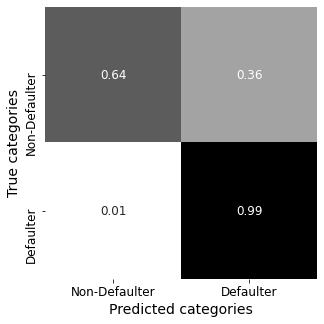

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,pred)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Non-Defaulter','Defaulter']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='gist_gray_r',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

Unsupervised Learning - K-means Clustering

In [ ]:
from sklearn.cluster import KMeans 
from mpl_toolkits.mplot3d import Axes3D 

Customer Segmentation Dataset

In [ ]:
df1 = pd.read_csv("Cust_Segmentation.csv")
df1.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [ ]:
df1.columns

Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'Address', 'DebtIncomeRatio'],
      dtype='object')

In [ ]:
df1.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [ ]:
df1['Address'].unique()

array(['NBA001', 'NBA021', 'NBA013', 'NBA009', 'NBA008', 'NBA016',
       'NBA006', 'NBA011', 'NBA010', 'NBA003', 'NBA000', 'NBA019',
       'NBA005', 'NBA004', 'NBA022', 'NBA018', 'NBA002', 'NBA007',
       'NBA026', 'NBA020', 'NBA012', 'NBA014', 'NBA024', 'NBA015',
       'NBA017', 'NBA023', 'NBA025', 'NBA027', 'NBA031', 'NBA030',
       'NBA034', 'NBA029'], dtype=object)

Dropping unfavourable variables

In [ ]:
df1.drop(['Address'], axis = 1,inplace = True)
df1.drop(['Customer Id'],axis = 1,inplace = True)
df1.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


Correlation Heatmap

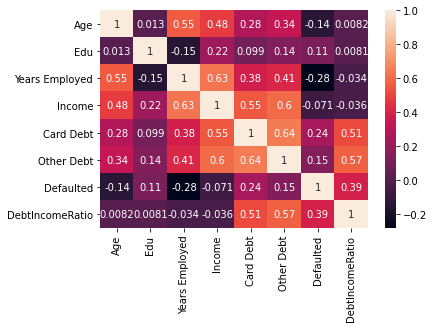

In [ ]:
sns.heatmap(df1.corr(),annot=True) 

In [ ]:
X = df1.values
X = np.nan_to_num(X)
X[:5]

array([[4.100e+01, 2.000e+00, 6.000e+00, 1.900e+01, 1.240e-01, 1.073e+00,
        0.000e+00, 6.300e+00],
       [4.700e+01, 1.000e+00, 2.600e+01, 1.000e+02, 4.582e+00, 8.218e+00,
        0.000e+00, 1.280e+01],
       [3.300e+01, 2.000e+00, 1.000e+01, 5.700e+01, 6.111e+00, 5.802e+00,
        1.000e+00, 2.090e+01],
       [2.900e+01, 2.000e+00, 4.000e+00, 1.900e+01, 6.810e-01, 5.160e-01,
        0.000e+00, 6.300e+00],
       [4.700e+01, 1.000e+00, 3.100e+01, 2.530e+02, 9.308e+00, 8.908e+00,
        0.000e+00, 7.200e+00]])

In [ ]:
kmeans = []
for n in range(3,11):
  k = KMeans(n_clusters = n,init = 'k-means++',n_init = 12)
  k.fit(X)
  kmeans.append(k.inertia_)

Elbow plot for the best K value (K = 4 from the graph).

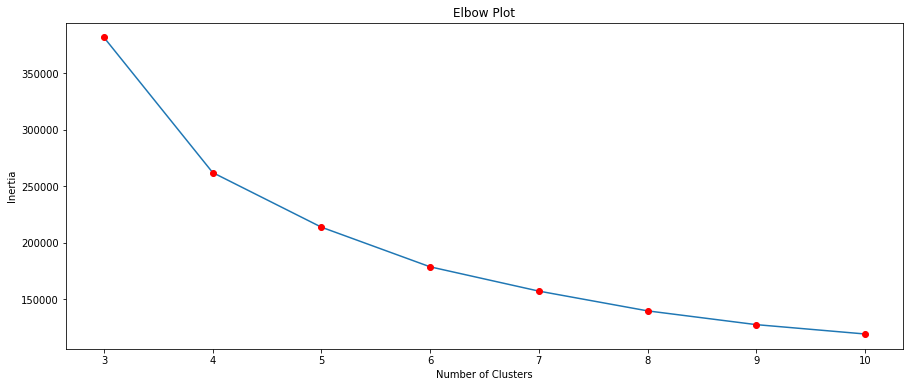

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(np.arange(3,11), kmeans, '-')
plt.plot(np.arange(3,11), kmeans,'o', c = 'r')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

In [ ]:
k_mean = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_mean.fit(X)
labels = k_mean.labels_
centroids = k_mean.cluster_centers_

In [ ]:
df1["Clus_km"] = labels
df1.head(5)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,41,2,6,19,0.124,1.073,0.0,6.3,0
1,47,1,26,100,4.582,8.218,0.0,12.8,1
2,33,2,10,57,6.111,5.802,1.0,20.9,3
3,29,2,4,19,0.681,0.516,0.0,6.3,0
4,47,1,31,253,9.308,8.908,0.0,7.2,2


In [ ]:
df1.groupby('Clus_km').mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,
0,32.037634,1.611111,5.451613,28.016129,0.924932,1.894054,0.295259,10.112366
1,43.403226,2.193548,19.145161,122.435484,3.925065,7.271210,0.127660,9.151613
2,46.600000,2.300000,21.200000,270.900000,7.884000,13.375200,0.428571,8.210000
3,39.731818,1.800000,12.909091,62.459091,2.281777,4.434127,0.203297,10.698636


2D and 3D scatter plots to visualise the clusters formed.

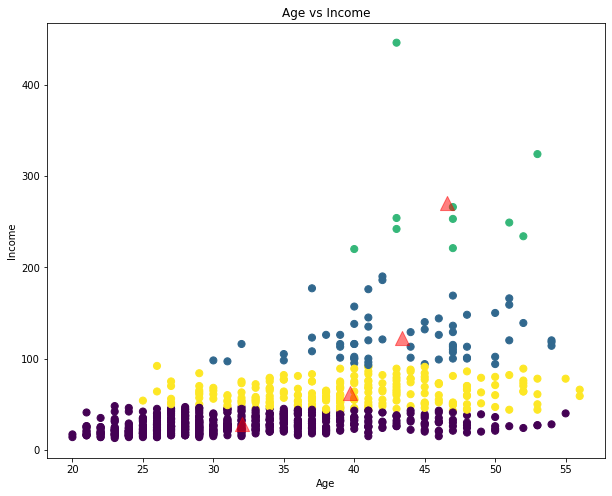

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0],X[:, 3], c = labels, s = 50, cmap = 'viridis')
plt.scatter(centroids[:,0], centroids[:,3], marker = '^', c = 'red', s = 200, alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income')
plt.grid(False)
plt.show()

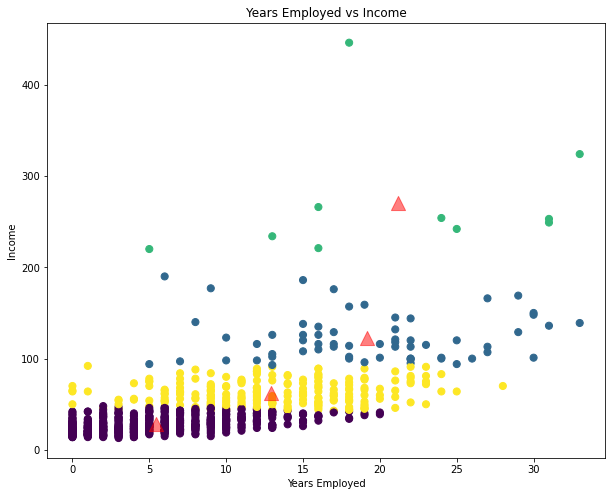

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 2],X[:, 3], c = labels, s = 50, cmap = 'viridis')
plt.scatter(centroids[:, 2], centroids[:, 3], marker = '^', c = 'red', s = 200, alpha = 0.5)
plt.xlabel('Years Employed')
plt.ylabel('Income')
plt.title('Years Employed vs Income')
plt.grid(False)
plt.show()

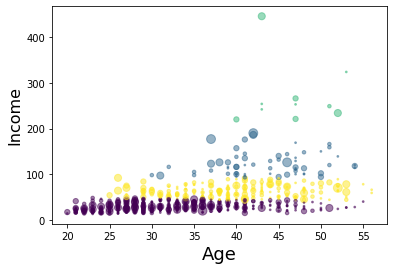

In [ ]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s = area, c = labels.astype(np.float), alpha = 0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

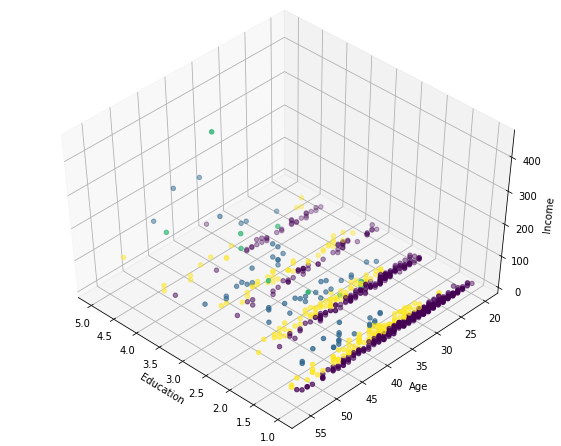

In [ ]:
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c = labels.astype(np.float))